In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import numpy as np
import re
import time
import datetime
import matplotlib.dates as mdates
from math import ceil

from collections import Counter

In [3]:
def extract_split_data(data):    
    content = re.findall("\[(.*?)\]", data)
    timestamps = []
    values = []
    for c in content[0].split(","):
        c = (c.strip()[1:-1])
        if len(c)>21:  
            x, y = c.split("#")
            values.append(int(x))
            timestamps.append(y) 
    return timestamps, values

def de_timestampe(time):
    
    # get year month date
    y = time.split()[0].split("-")[0]
    m = time.split()[0].split("-")[1]
    d = time.split()[0].split("-")[2]
    # get hour minute second
    h = time.split()[1].split(":")[0]
    mi = time.split()[1].split(":")[1]
    s = time.split()[1].split(":")[2]
    
    t = m + " " + d + " " + h + ":" + mi + ":" + s + " " + y
    good_format = datetime.datetime.strptime(t, '%m %d %H:%M:%S.%f %Y' )
    return good_format

In [5]:
# begin/end/during: variance, slope, 
veryBeginning = []
nearEnd = []
duringGame = []

size = 3 # half

for url in glob.glob("/Users/xueguoliang/Desktop/tmp/*.csv"):
    
    player = pd.read_csv(url, delimiter=";")
    
    for session in player['GSR']:       
        time, rate = extract_split_data(session)
        #print (time)
        #print((de_timestampe(time[1])-de_timestampe(time[0])).seconds)
        rates += rate
        if len(time)>5: # when the number of timestamp greater than the 5, in case of the substract problem
            diff = (de_timestampe(time[-1]) - de_timestampe(time[0])).seconds
            if diff>10: # when the span of game session greater than 10 seconds
                veryBeginning.append(rate[0:6])
                nearEnd.append(rate[-7:-1]) # get 6 data points
                if len(time)%2 == 0:
                    duringGame.append(rate[len(time)//2-size+1:len(time)//2+size-1])
                else:
                    duringGame.append(rate[len(time)//2-size+1:len(time)//2+size-1])
                    

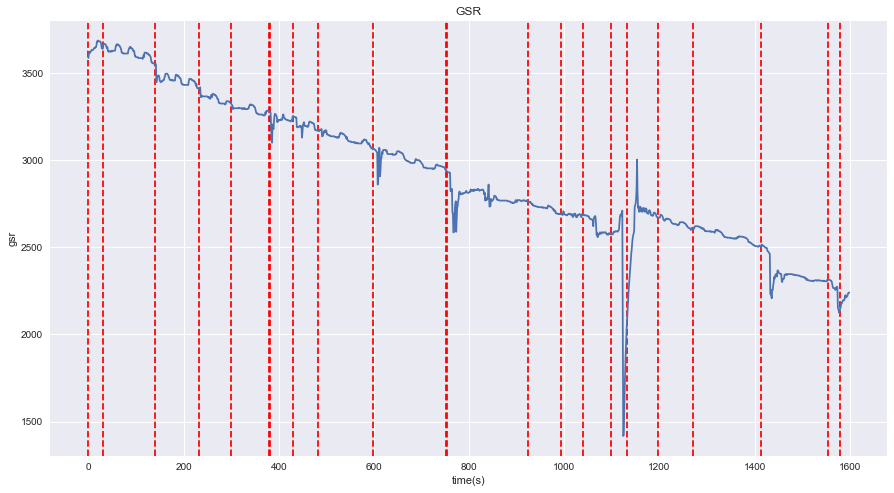

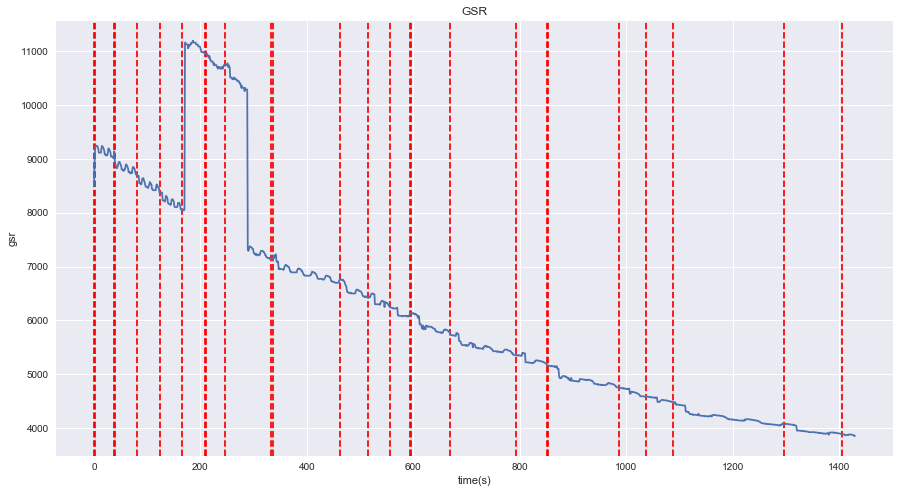

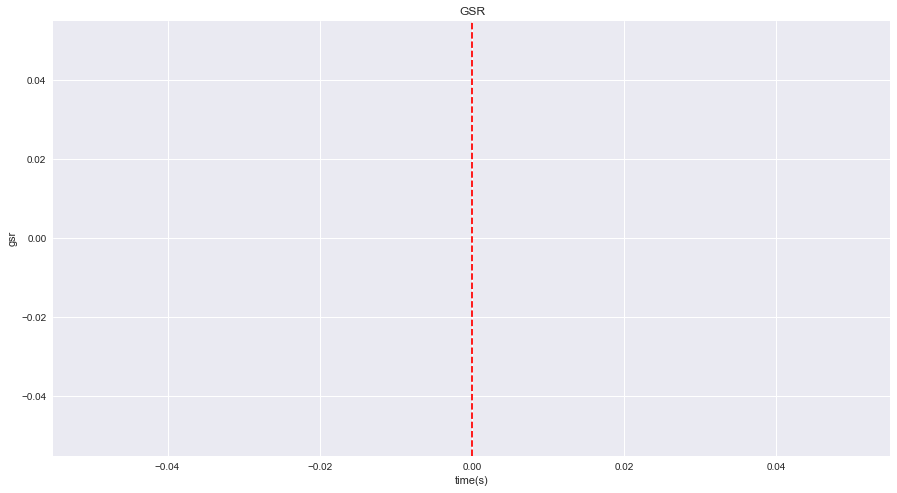

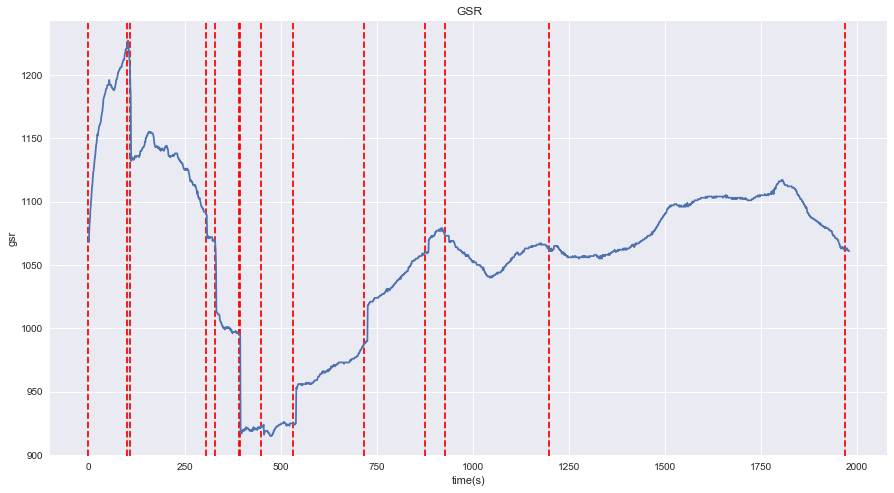

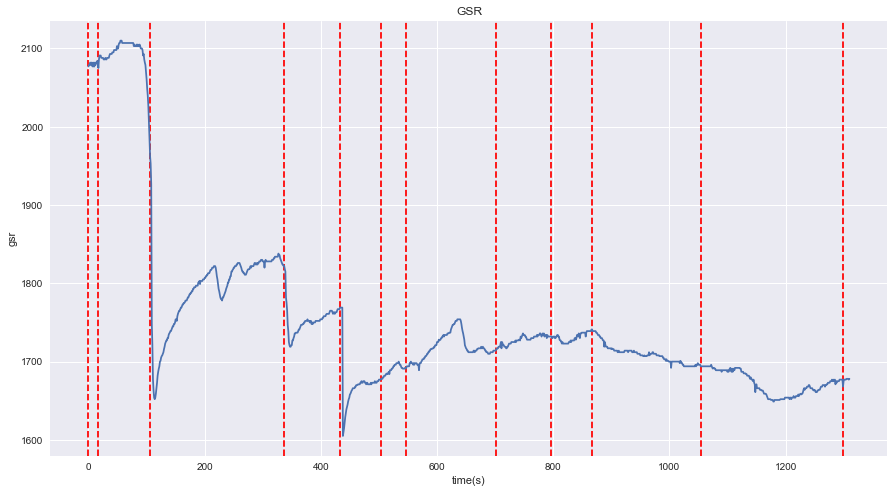

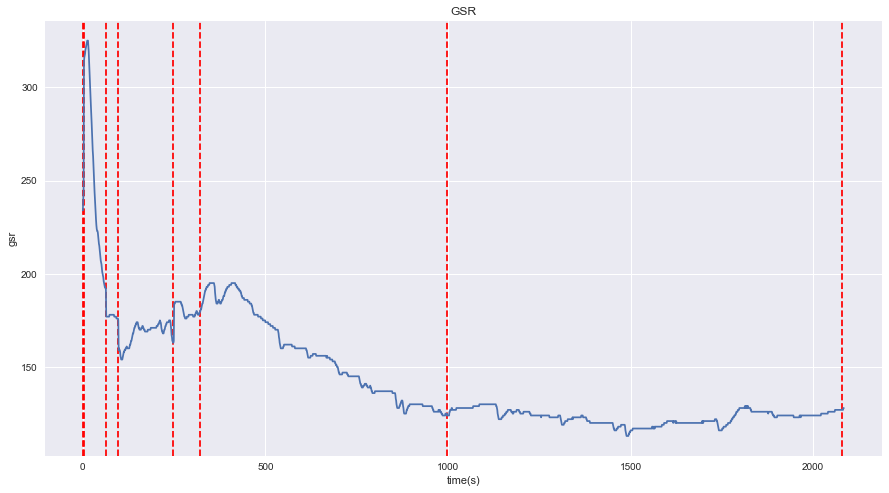

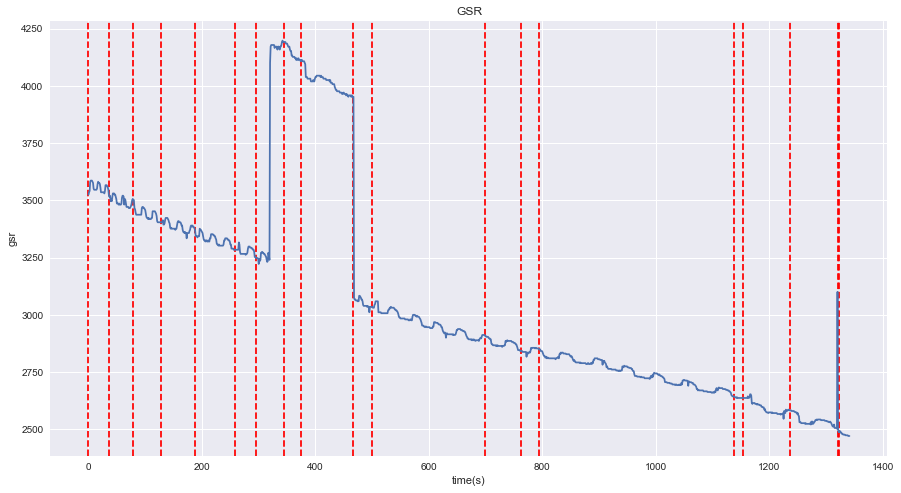

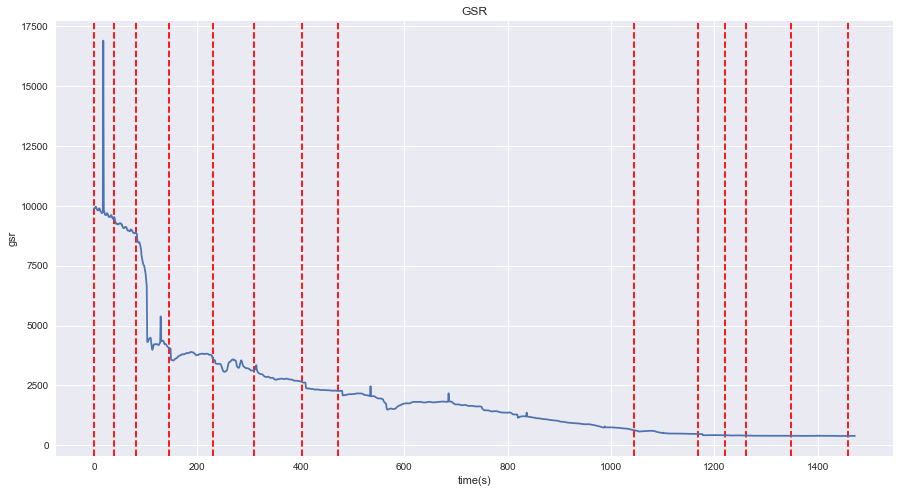

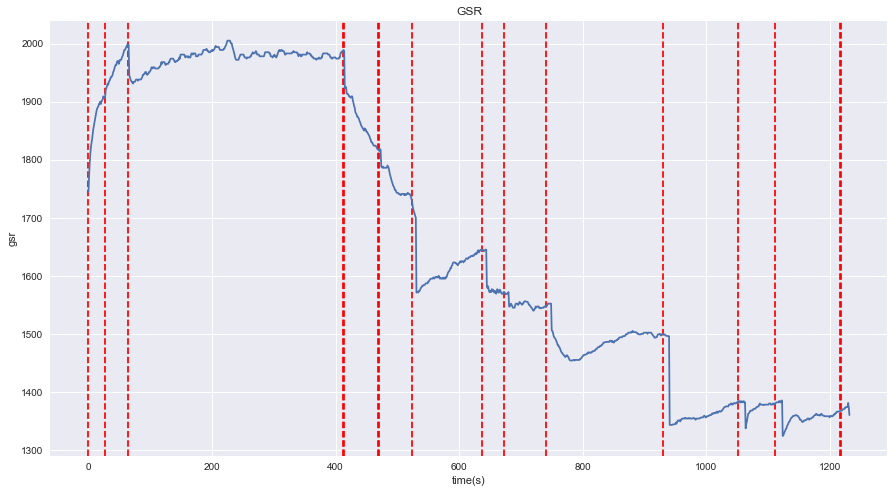

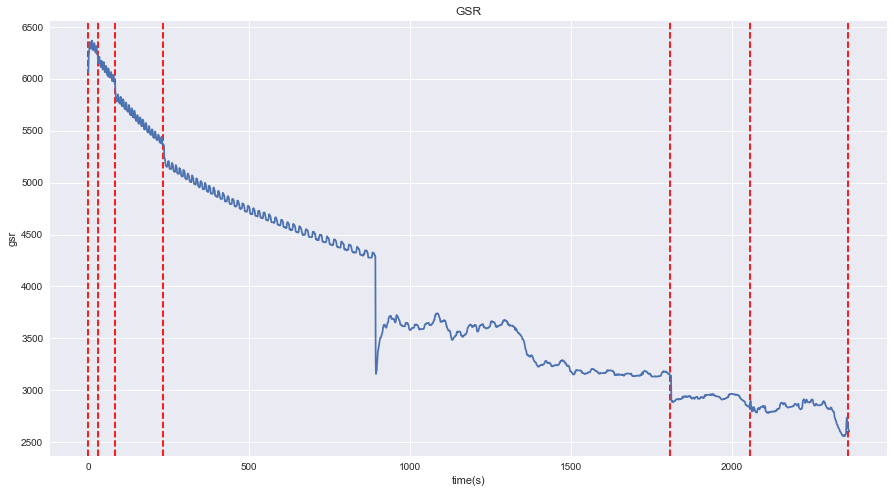

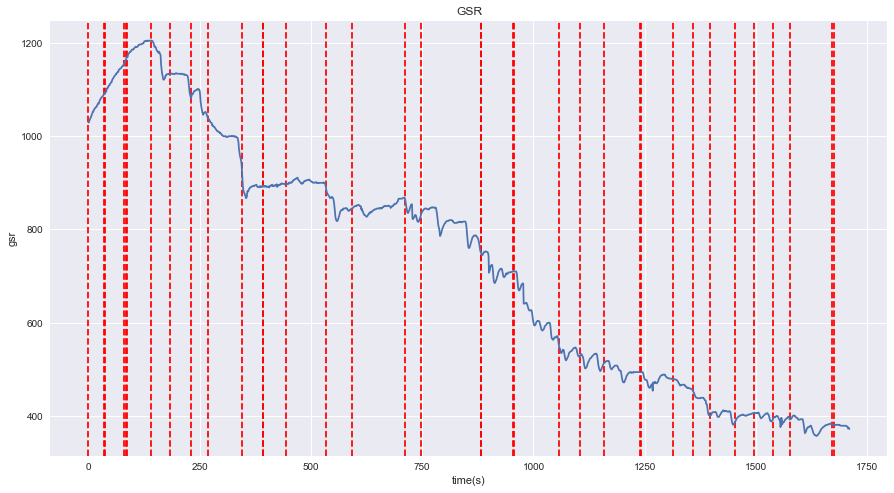

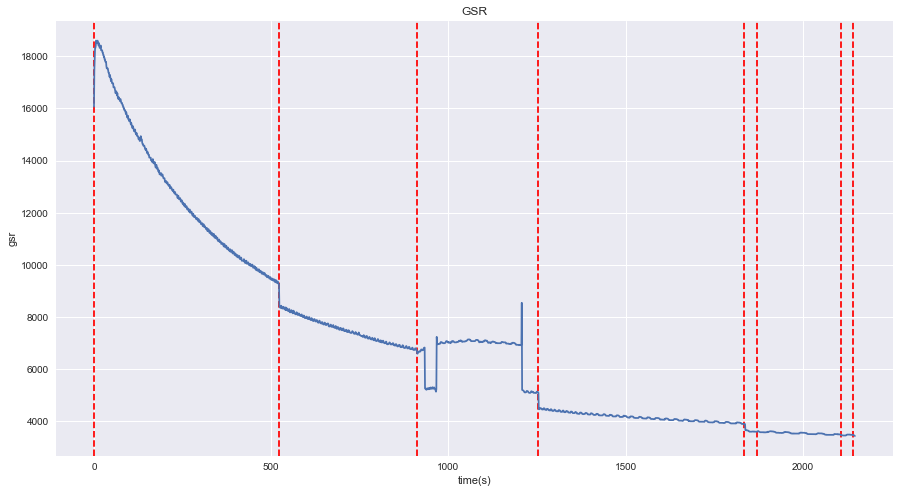

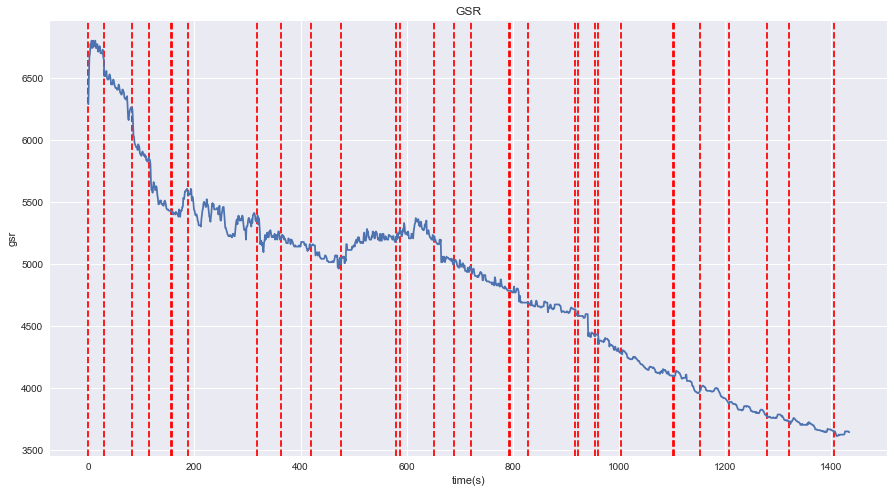

In [6]:
for url in glob.glob("/Users/xueguoliang/Desktop/tmp/*.csv"):
    rates = []
    flags = [0]
    pos = 0
    player = pd.read_csv(url, delimiter=";")
    for session in player['GSR']:       
        time, rate = extract_split_data(session)
        rates += rate
        pos += len(time)-1
        if pos>0:
            flags.append(pos)
        
    
    # plot
    fig, ax = plt.subplots(figsize=(15,8))
    plt.title("GSR")
    for f in flags:
        plt.axvline(x=f, color='r', linestyle='--')
    plt.plot(rates)
    ax.set_xlabel("time(s)")    
    ax.set_ylabel("gsr")
    plt.show()
        